**1. Import Necessary Libraries:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

**2. Load and Smooth Data:**


In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'  # You can replace this URL with your dataset
data = pd.read_csv(url, usecols=[1], engine='python')
data

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


**3.  For illustration, create a mock dataset with two time series**

In [ ]:
import numpy as np
data['series2'] = data['Passengers'] * np.random.normal(1, 0.1, size=len(data))

**4.Make DateTime as index**

In [ ]:
data['Date'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')
data.set_index('Date', inplace=True)
data_diff = data.diff().dropna()

<ipython-input-5-d6e8777f26bc>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Date'] = pd.date_range(start='1949-01-01', periods=len(data), freq='M')


**5. Train Model:**

In [ ]:
model = VAR(data_diff)
lag_order = model.select_order().aic  # Using AIC criterion to select the optimal lag
result = model.fit(lag_order)  # Fit the model with the selected lag order

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


**6. Forecast and Evaluate:**

In [ ]:
forecast_steps = 10  # Forecasting the next 10 steps
forecast = result.forecast(data_diff.values[-lag_order:], steps=forecast_steps)
# Create forecast index (adjust the frequency as needed)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:]

# Convert the forecast into a DataFrame
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=data.columns)

<ipython-input-7-9121f72e6715>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='M')[1:]



**7. Visualization:**

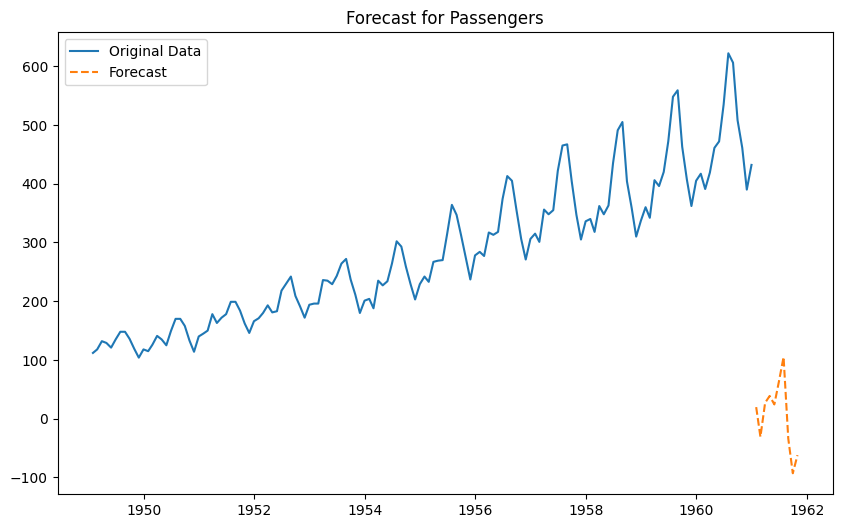

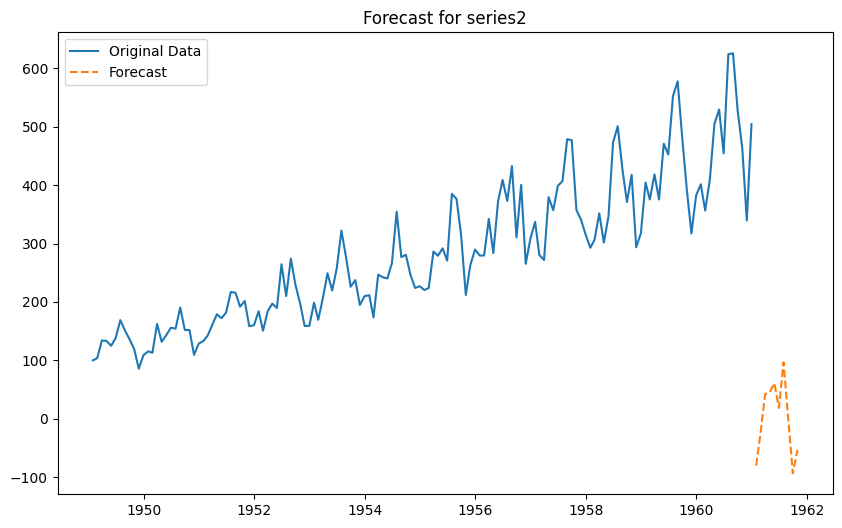

In [ ]:
for column in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data[column], label='Original Data')
    plt.plot(forecast_df[column], label='Forecast', linestyle='--')
    plt.title(f"Forecast for {column}")
    plt.legend()
    plt.show()